**Grupo**: Bruno Pilão, Larissa Nobrega, Maria Mello, Mateus Norcia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from PIL import Image

In [ ]:
def load_image(path, grayscale=True):
    image = Image.open(path)
    if grayscale:
        image = image.convert("L")
    return np.array(image, dtype=np.float32)

def save_image(array, path):
    img = Image.fromarray(np.clip(array, 0, 255).astype(np.uint8))
    img.save(path)

def mean_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    return convolve(image, kernel, mode='constant', cval=0.0)

In [ ]:
def median_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='edge')
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.median(padded[i:i+kernel_size, j:j+kernel_size])
    return output

In [ ]:
def edge_detection(image, kernel_size=3):
    blurred = mean_filter(image, kernel_size)
    edges = image - blurred
    return np.clip(edges + 128, 0, 255)

In [ ]:
def sharpen_image(image, kernel_size=3):
    blurred = mean_filter(image, kernel_size)
    sharpened = image + (image - blurred)
    return np.clip(sharpened, 0, 255)


In [ ]:
def erode(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='edge')
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.min(padded[i:i+kernel_size, j:j+kernel_size])
    return output

In [ ]:
def dilate(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded = np.pad(image, pad_size, mode='edge')
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.max(padded[i:i+kernel_size, j:j+kernel_size])
    return output

In [ ]:
def show_image(image_array, title="Imagem Processada"):
    plt.imshow(image_array, cmap="gray")
    plt.title(title)
    plt.axis("off")  # Esconde os eixos
    plt.show()


In [ ]:
# Testando blur
img = load_image("/content/DSC04208.JPG")
blurred = mean_filter(img, kernel_size=15)
save_image(blurred, "blurred.jpg")

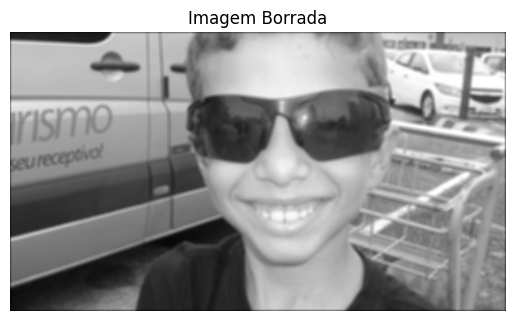

In [ ]:
image_array = np.array(Image.open("blurred.jpg"))
show_image(image_array, "Imagem Borrada")

In [ ]:
median_filtered = median_filter(img, kernel_size=15)

In [ ]:
save_image(median_filtered, "median_filtered.jpg")

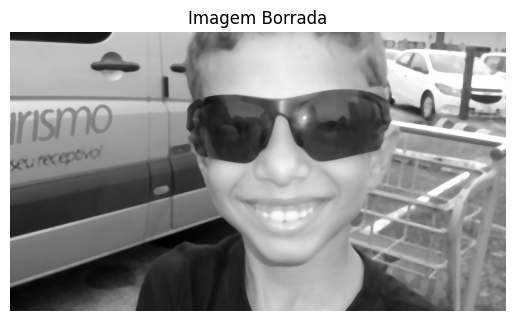

In [ ]:
img_median = np.array(Image.open("median_filtered.jpg"))
show_image(img_median, "Imagem Borrada")

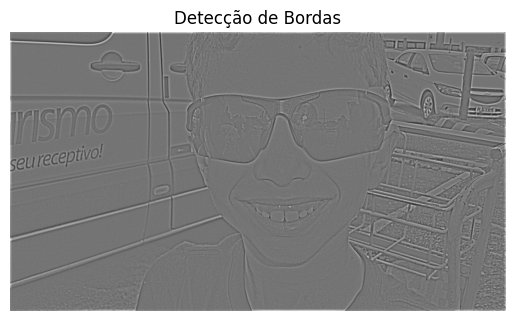

In [ ]:
edges = edge_detection(img, kernel_size=15)
save_image(edges, "edges.jpg")
img_edges = np.array(Image.open("edges.jpg"))
show_image(img_edges, "Detecção de Bordas")

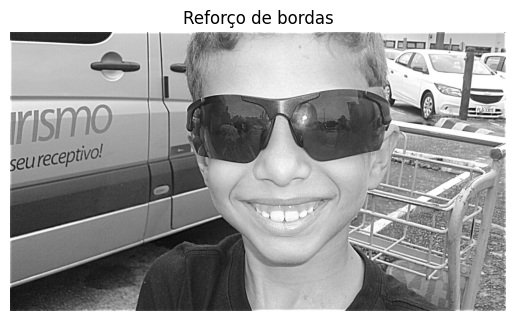

In [ ]:
sharpened = sharpen_image(img, kernel_size=15)
save_image(sharpened, "sharpened.jpg")
img_sharpened = np.array(Image.open("sharpened.jpg"))
show_image(img_sharpened, "Reforço de bordas")


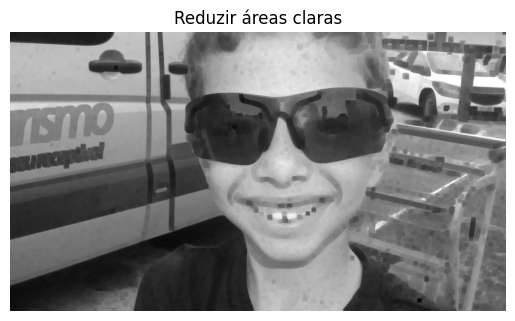

In [ ]:
eroded = erode(img, kernel_size=15)
save_image(eroded, "eroded.jpg")
img_eroded = np.array(Image.open("eroded.jpg"))
show_image(img_eroded, "Reduzir áreas claras")


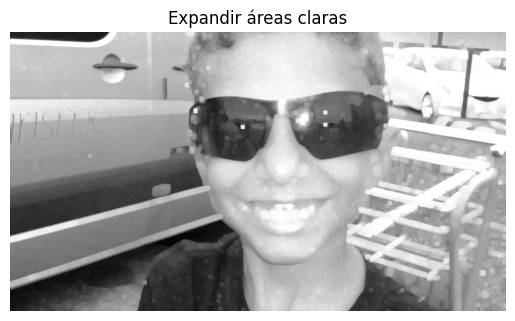

In [ ]:
dilated = dilate(img, kernel_size=15)
save_image(dilated, "dilated.jpg")
img_dilated = np.array(Image.open("dilated.jpg"))
show_image(img_dilated, "Expandir áreas claras")
